# Logistic Regression for Diabetes Classification

## Import Statements and FileIO

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# read-in the dataframe to be used
df = pd.read_csv('supervisedLearning/Diabetes/diabetes_dataset.csv')

In [3]:
# Display first 30 rows of dataframe
df.head(30)
# 0 = No Diabetes
# 1 = Prediabetes or Diabetes

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [4]:
# look at the descriptive statistics of the read-in dataframe
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Our dataset came pre preprocessed - balanced, categorical variables for all the necessary columns.<br>

Diabetes Binary variables
<ul>
<li>0 = No Diabetes </li>
<li>1 = PreDiabetes or Diabetes</li>
</ul>

More information on the categorical variables can be found in the catalog published by the <a href = "https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_calculated_variables_version4.pdf"> CDC</a>.


## Train/Test Splits and Logistic Regression Instantiation

In [5]:
# make X,y train/test splits
X = df.drop(['Diabetes_binary'], axis = 1) # input data; ind. vars.
y = df['Diabetes_binary'] # target class

# Split the dataset into 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# make the Logistic Regression classifier
drDiagnosis = LogisticRegression(random_state=0, max_iter=1000)

In [7]:
# fit the model to the training data
drDiagnosis.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [8]:
# make predictions from model on novel data: X_test
y_preds = drDiagnosis.predict(X_test)

In [9]:
# Return the mean accuracy on the given test data and labels.
drDiagnosis.score(X_test, y_test)

0.7496994129712143

## Obtain the Performance Metrics

In [10]:
# write function to determine accuracy using numpy arrays 
# of y_test.values and y_preds
def get_accuracy(array_one, array_two):
    # check if arrays not equal and break with value one returned if score
    if (len(array_one)!=len(array_two)):
        return -1
    num_equal = 0
    for index in range(len(array_one)):
        if (array_one[index]==array_two[index]):
            num_equal += 1
    accuracy = num_equal / len(array_one)
    return accuracy

In [11]:
# calculate and display the accuracy of the model
accuracy = get_accuracy(y_test.values, y_preds)
print("Accuracy of LogRegr_Classifier: {0}".format(accuracy))

Accuracy of LogRegr_Classifier: 0.7496994129712143


In [12]:
# obtain TN, FP, FN, TP w/ confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test.values, y_preds).ravel()

Equations:

Precision = TP/TP + FP

Recall = TP/TP + FN

F1 = 2PR/P + R

In [13]:
# Compute and Display precision of LogRegr model
precision = tp/(tp+fp)
print("Precision: {0}".format(precision))

Precision: 0.7467707212055974


In [14]:
# Compute and Display recall of LogRegr model
recall = tp/(tp+fn)
print("Recall: {0}".format(recall))

Recall: 0.770084639933398


In [15]:
# Compute and Display f1_score of LogRegr model
f1_score = (2*precision*recall)/(precision+recall)
print("f1_score: {0}".format(f1_score))

f1_score: 0.7582485142427762


In [16]:
print(classification_report(y_test.values, y_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6932
         1.0       0.75      0.77      0.76      7207

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [17]:
#roc_curve(y_test, y_preds)
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
roc_auc = auc(fpr, tpr)
print("AUROC of LogRegr Model: ", roc_auc)

AUROC of LogRegr Model:  0.7492950608784128


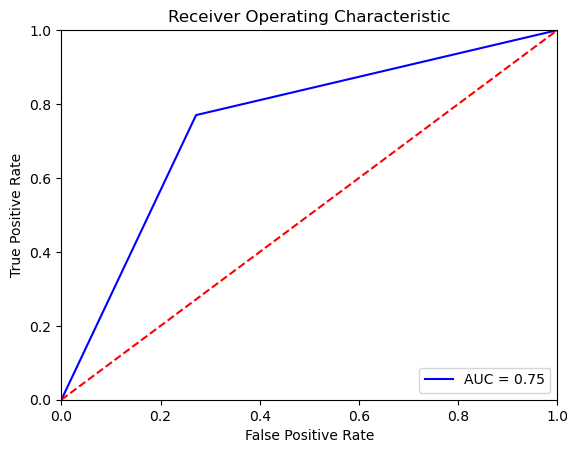

In [18]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Save the Model


In [20]:
#Saving the MLP Model
Diabetes_LogRegr = 'supervisedLearning/models/drDiagnosis_LogRegr_diabetes.sav'
pickle.dump(drDiagnosis, open(Diabetes_LogRegr, 'wb'))